In [1]:
#Install mlxtend (only for Colab or Jupyter)
!pip install mlxtend

In [2]:
#Import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
#Create custom transaction dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['beer', 'bread'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread'],
    ['bread', 'butter'],
    ['milk', 'butter'],
    ['beer', 'bread'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter']
]

In [4]:
#One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [5]:
#Apply Apriori
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

In [6]:
#Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

In [7]:
#Filter rules with support and confidence > 0.4
filtered_rules = rules[(rules['support'] > 0.4) & (rules['confidence'] > 0.4)]

In [8]:
#Output results
print("🔍 Frequent Itemsets:\n", frequent_itemsets)
print("\n📌 Association Rules (Support & Confidence > 0.4):\n", filtered_rules)

🔍 Frequent Itemsets:
    support               itemsets
0      0.9                (bread)
1      0.6               (butter)
2      0.7                 (milk)
3      0.5        (bread, butter)
4      0.6          (milk, bread)
5      0.5         (milk, butter)
6      0.4  (milk, bread, butter)

📌 Association Rules (Support & Confidence > 0.4):
   antecedents consequents  antecedent support  consequent support  support  \
0     (bread)    (butter)                 0.9                 0.6      0.5   
1    (butter)     (bread)                 0.6                 0.9      0.5   
2      (milk)     (bread)                 0.7                 0.9      0.6   
3     (bread)      (milk)                 0.9                 0.7      0.6   
4      (milk)    (butter)                 0.7                 0.6      0.5   
5    (butter)      (milk)                 0.6                 0.7      0.5   

   confidence      lift  representativity  leverage  conviction  \
0    0.555556  0.925926               1.

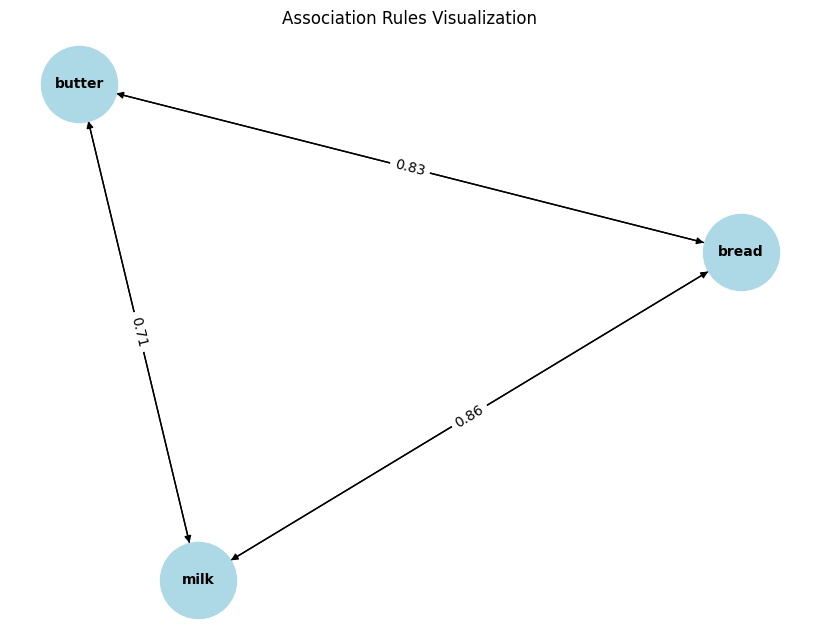

In [9]:
#Visualization

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

for _, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

# Draw the graph
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
labels = {k: f"{v:.2f}" for k, v in labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Association Rules Visualization")
plt.show()